In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Set path to the Excel spreadsheet containing the PCA test set accuracies
pca_path = 'assets/PCA/PCA_acc.xlsx'

# Read in each Excel worksheet which contains the results for each datsets
car_pca = pd.read_excel(pca_path, sheet_name='Car')
forest_pca = pd.read_excel(pca_path, sheet_name='Forest')
mushroom_pca = pd.read_excel(pca_path, sheet_name='Mushroom')
digits_pca = pd.read_excel(pca_path, sheet_name='Digit')

In [3]:
# View and verify pca results
car_pca

,Dimensionality,Approximate Explained Variance (%) (2 d.p),"Accuracy [Z, ZZ]",Accuracy [‘ZZ’],Accuracy [‘Z’],"Accuracy [Y, YY]",Accuracy RBF
0,2,0.4545,0.45,0.36,0.57,0.48,0.52
1,3,0.6420,0.62,0.43,0.79,0.50,0.81
2,4,0.7913,0.71,0.50,0.88,0.50,0.86
3,5,0.9097,0.86,0.69,0.90,0.50,0.86
4,6,1.0000,0.81,0.67,0.93,0.43,0.90
5,7,NaN,NaN,NaN,NaN,0.50,NaN


In [4]:
# View and verify pca results
mushroom_pca

,Dimensionality,Approximate Explained Variance (%),"Accuracy [Z, ZZ]",Accuracy [‘ZZ’],Accuracy [‘Z’],"Accuracy [Y, YY]",Accuracy RBF
0,2,0.2885,0.79,0.79,0.79,0.72,0.79
1,3,0.3800,0.87,0.87,0.79,0.94,0.89
2,4,0.4486,0.91,0.91,0.87,0.96,0.91
3,5,0.5011,0.94,0.96,0.89,0.96,0.87
4,6,0.5418,1.00,1.00,0.98,0.98,0.98
5,7,0.5742,1.00,1.00,1.00,0.94,1.00


In [5]:
# View and verify pca results
forest_pca

,Dimensionality,Approximate Explained Variance (%),"Accuracy [Z, ZZ]",Accuracy [‘ZZ’],Accuracy [‘Z’],"Accuracy [Y, YY]",Accuracy RBF
0,2,0.2060,0.54,0.50,0.58,0.51,0.52
1,3,0.2733,0.52,0.52,0.55,0.58,0.55
2,4,0.3379,0.69,0.66,0.65,0.62,0.66
3,5,0.3843,0.72,0.68,0.68,0.60,0.72
4,6,0.4289,0.63,0.68,0.75,0.57,0.75
5,7,0.4689,0.69,0.69,0.75,0.60,0.71


In [6]:
# View and verify pca results
digits_pca

,Dimensionality,Approximate Explained Variance (%),"Accuracy [Z, ZZ]",Accuracy [‘ZZ’],Accuracy [‘Z’],"Accuracy [Y, YY]",Accuracy RBF
0,2,0.2788,0.91,0.83,0.89,0.45,0.90
1,3,0.3665,0.90,0.84,0.88,0.38,0.88
2,4,0.4427,0.91,0.84,0.90,0.53,0.90
3,5,0.5042,0.95,0.84,0.90,0.59,0.93
4,6,0.5476,0.93,0.91,0.93,0.55,0.95
5,7,0.5836,0.93,0.86,0.97,0.59,0.97


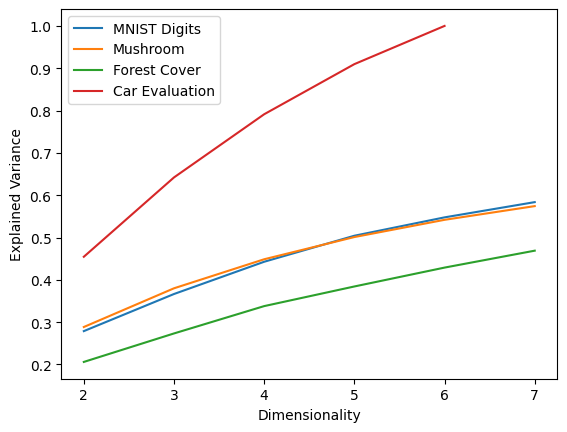

In [7]:
# Plot the amount of explained variance captured by a given number of principal components

plt.plot(digits_pca["Dimensionality"], digits_pca["Approximate Explained Variance (%)"], label="MNIST Digits")
plt.plot(mushroom_pca["Dimensionality"], mushroom_pca["Approximate Explained Variance (%)"], label="Mushroom")
plt.plot(forest_pca["Dimensionality"], forest_pca["Approximate Explained Variance (%)"], label="Forest Cover")
plt.plot(car_pca["Dimensionality"], car_pca["Approximate Explained Variance (%) (2 d.p)"], label="Car Evaluation")
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance")   
plt.legend()
plt.show()


#### Mushroom

In [8]:
# View PCA results
mushroom_pca

,Dimensionality,Approximate Explained Variance (%),"Accuracy [Z, ZZ]",Accuracy [‘ZZ’],Accuracy [‘Z’],"Accuracy [Y, YY]",Accuracy RBF
0,2,0.2885,0.79,0.79,0.79,0.72,0.79
1,3,0.3800,0.87,0.87,0.79,0.94,0.89
2,4,0.4486,0.91,0.91,0.87,0.96,0.91
3,5,0.5011,0.94,0.96,0.89,0.96,0.87
4,6,0.5418,1.00,1.00,0.98,0.98,0.98
5,7,0.5742,1.00,1.00,1.00,0.94,1.00


In [9]:
# Remove columns so only the feature map columns remain
fm_columns = list(mushroom_pca.columns)
fm_columns.remove('Dimensionality')
fm_columns.remove("Approximate Explained Variance (%)")

# Reshape explained variance column into an array and express as a percentage
x = np.array(mushroom_pca["Approximate Explained Variance (%)"]*100).reshape(-1, 1)
x = sm.add_constant(x)

fm_reg = {}

# Iterate over each feature map, reshape and express accuracy as a percentage
for column in fm_columns:
    y = np.array(mushroom_pca[column]*100).reshape(-1, 1)
    
    # Run OLS regression detailed in dissertation document for each feature map
    smodel = sm.OLS(y, x)
    results = smodel.fit()
    print(column)
    print(results.summary())

Accuracy [Z, ZZ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           0.000121
Time:                        15:22:04   Log-Likelihood:                -8.4441
No. Observations:                   6   AIC:                             20.89
Df Residuals:                       4   BIC:                             20.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.7132      2.358   

/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.

#### Forest Covertype

In [10]:
# View PCA results
forest_pca

,Dimensionality,Approximate Explained Variance (%),"Accuracy [Z, ZZ]",Accuracy [‘ZZ’],Accuracy [‘Z’],"Accuracy [Y, YY]",Accuracy RBF
0,2,0.2060,0.54,0.50,0.58,0.51,0.52
1,3,0.2733,0.52,0.52,0.55,0.58,0.55
2,4,0.3379,0.69,0.66,0.65,0.62,0.66
3,5,0.3843,0.72,0.68,0.68,0.60,0.72
4,6,0.4289,0.63,0.68,0.75,0.57,0.75
5,7,0.4689,0.69,0.69,0.75,0.60,0.71


In [11]:
# Remove columns so only the feature map columns remain
fm_columns = list(forest_pca.columns)
fm_columns.remove('Dimensionality')
fm_columns.remove("Approximate Explained Variance (%)")

# Reshape explained variance column into an array and express as a percentage
x = np.array(forest_pca["Approximate Explained Variance (%)"]*100).reshape(-1, 1)
x = sm.add_constant(x)

fm_reg = {}

# Iterate over each feature map, reshape and express accuracy as a percentage
for column in fm_columns:
    y = np.array(forest_pca[column]*100).reshape(-1, 1)
    
    # Run OLS regression detailed in dissertation document for each feature map
    smodel = sm.OLS(y, x)
    results = smodel.fit()
    print(column)
    print(results.summary())

Accuracy [Z, ZZ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     5.026
Date:                Sun, 21 Apr 2024   Prob (F-statistic):             0.0884
Time:                        15:22:04   Log-Likelihood:                -18.312
No. Observations:                   6   AIC:                             40.62
Df Residuals:                       4   BIC:                             40.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.7897     10.305   

/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.

#### Car Evalaution

In [12]:
# View PCA results
car_pca

,Dimensionality,Approximate Explained Variance (%) (2 d.p),"Accuracy [Z, ZZ]",Accuracy [‘ZZ’],Accuracy [‘Z’],"Accuracy [Y, YY]",Accuracy RBF
0,2,0.4545,0.45,0.36,0.57,0.48,0.52
1,3,0.6420,0.62,0.43,0.79,0.50,0.81
2,4,0.7913,0.71,0.50,0.88,0.50,0.86
3,5,0.9097,0.86,0.69,0.90,0.50,0.86
4,6,1.0000,0.81,0.67,0.93,0.43,0.90
5,7,NaN,NaN,NaN,NaN,0.50,NaN


In [13]:
# Remove columns so only the feature map columns remain

# Remove the row for dimensionality = 7 since Car Evaulation dataset has only 6 dimensions
car_pca = car_pca[:-1]
fm_columns = list(car_pca.columns)
fm_columns.remove('Dimensionality')
fm_columns.remove("Approximate Explained Variance (%) (2 d.p)")

# Reshape explained variance column into an array and express as a percentage
x = np.array(car_pca["Approximate Explained Variance (%) (2 d.p)"]*100).reshape(-1, 1)
x = sm.add_constant(x)

fm_reg = {}

# Iterate over each feature map, reshape and express accuracy as a percentage
for column in fm_columns:
    y = np.array(car_pca[column]*100).reshape(-1, 1)
    
    # Run OLS regression detailed in dissertation document for each feature map
    smodel = sm.OLS(y, x)
    results = smodel.fit()
    print(column)
    print(results.summary())

Accuracy [Z, ZZ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     40.73
Date:                Sun, 21 Apr 2024   Prob (F-statistic):            0.00779
Time:                        15:22:04   Log-Likelihood:                -13.792
No. Observations:                   5   AIC:                             31.58
Df Residuals:                       3   BIC:                             30.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9447      8.904   

/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.

#### Digits

In [14]:
# View PCA results
digits_pca

,Dimensionality,Approximate Explained Variance (%),"Accuracy [Z, ZZ]",Accuracy [‘ZZ’],Accuracy [‘Z’],"Accuracy [Y, YY]",Accuracy RBF
0,2,0.2788,0.91,0.83,0.89,0.45,0.90
1,3,0.3665,0.90,0.84,0.88,0.38,0.88
2,4,0.4427,0.91,0.84,0.90,0.53,0.90
3,5,0.5042,0.95,0.84,0.90,0.59,0.93
4,6,0.5476,0.93,0.91,0.93,0.55,0.95
5,7,0.5836,0.93,0.86,0.97,0.59,0.97


In [15]:
# Remove columns so only the feature map columns remain
fm_columns = list(digits_pca.columns)
fm_columns.remove('Dimensionality')
fm_columns.remove("Approximate Explained Variance (%)")

# Reshape explained variance column into an array and express as a percentage
x = np.array(digits_pca["Approximate Explained Variance (%)"]*100).reshape(-1, 1)
x = sm.add_constant(x)

fm_reg = {}

# Iterate over each feature map, reshape and express accuracy as a percentage
for column in fm_columns:
    y = np.array(digits_pca[column]*100).reshape(-1, 1)
    
    # Run OLS regression detailed in dissertation document for each feature map
    smodel = sm.OLS(y, x)
    results = smodel.fit()
    print(column)
    print(results.summary())

Accuracy [Z, ZZ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     3.733
Date:                Sun, 21 Apr 2024   Prob (F-statistic):              0.126
Time:                        15:22:04   Log-Likelihood:                -9.6310
No. Observations:                   6   AIC:                             23.26
Df Residuals:                       4   BIC:                             22.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.1514      2.665   

/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/mogul/Downloads/new_env/new_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.

## Plotting

#### Digits

In [16]:
# Remove columns so only the feature map columns remain
fm_columns = list(digits_pca.columns)
fm_columns.remove('Dimensionality')
fm_columns.remove("Approximate Explained Variance (%)")

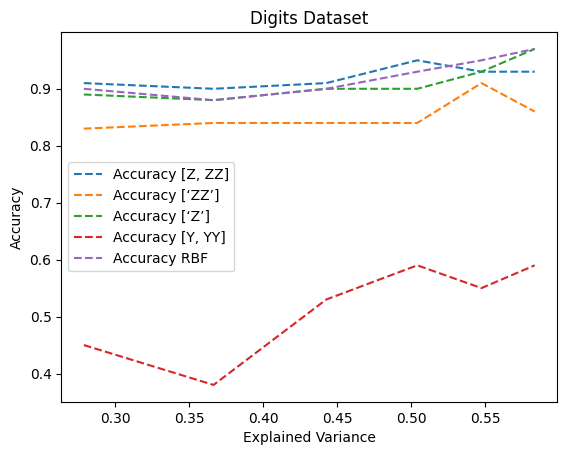

In [17]:
# Iterate over the feature map columns and plot the accuracy against explained variance
for column in fm_columns:
    plt.plot(digits_pca["Approximate Explained Variance (%)"], digits_pca[column], label=column, linestyle = '--')
    
plt.title("Digits Dataset")
plt.xlabel("Explained Variance")
plt.ylabel("Accuracy") 
plt.legend()
plt.show()

#### Mushroom

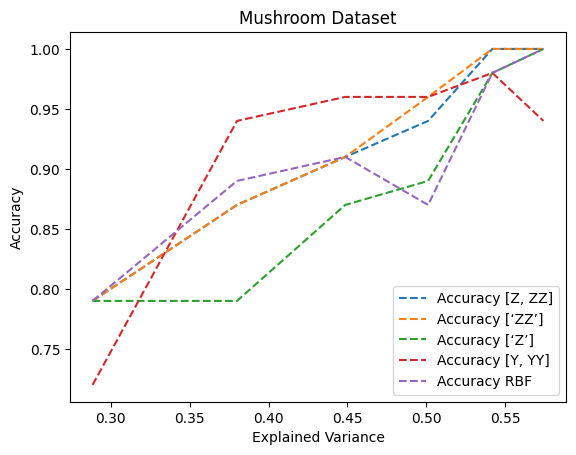

In [18]:
# Iterate over the feature map columns and plot the accuracy against explained variance
# Re-use fm_columns variable since feature map columns are the same for each dataset
for column in fm_columns:
    plt.plot(mushroom_pca["Approximate Explained Variance (%)"], mushroom_pca[column], label=column, linestyle = '--')
    
plt.title("Mushroom Dataset")
plt.xlabel("Explained Variance")
plt.ylabel("Accuracy")   
plt.legend()
plt.show()

#### Forest Covertype

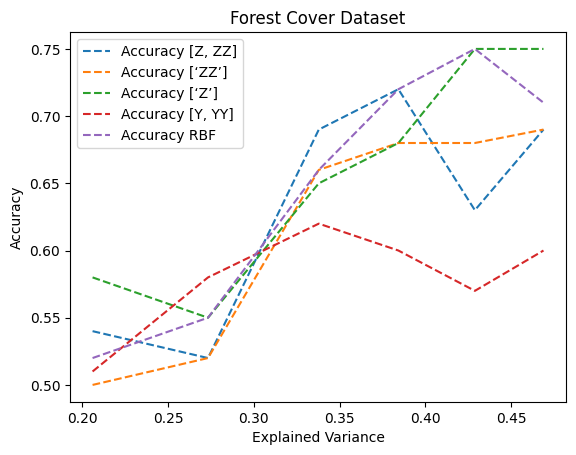

In [19]:
# Iterate over the feature map columns and plot the accuracy against explained variance
for column in fm_columns:
    plt.plot(forest_pca["Approximate Explained Variance (%)"], forest_pca[column], label=column, linestyle = '--')

plt.title("Forest Cover Dataset")
plt.xlabel("Explained Variance")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Car Evaultion

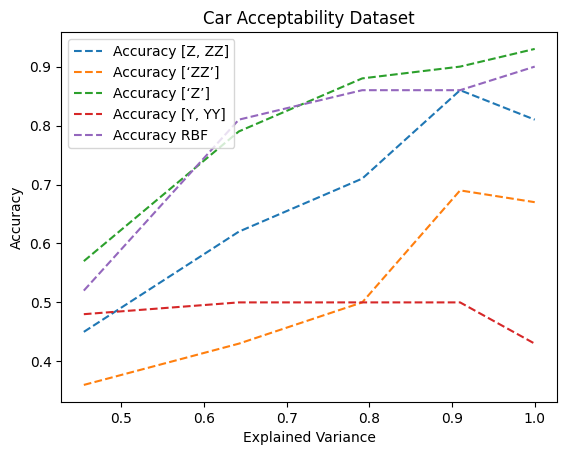

In [20]:
# Iterate over the feature map columns and plot the accuracy against explained variance
for column in fm_columns:
    plt.plot(car_pca["Approximate Explained Variance (%) (2 d.p)"], car_pca[column], label=column, linestyle = '--')

plt.title("Car Acceptability Dataset")
plt.xlabel("Explained Variance")
plt.ylabel("Accuracy")   
plt.legend()
plt.show()